Here is the formula of **Softmax** function:

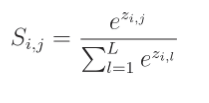

* As we said earlier, softmax function is used for **Output Layer.**

The first step for us is to “exponentiate” the outputs. We do this with **Euler’s number**, **e**, which is roughly **2.71828182846** and referred to as the “exponential growth” number. Exponentiating is taking this constant to the power of the given parameter:

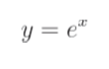

Both the numerator and the denominator of the Softmax function contain **e** raised to the power of z, where z, given indices, means a singular output value — the index i means the current sample and the index j means the current output in this sample. 

The numerator exponentiates the current output value and the denominator takes a sum of all of the exponentiated outputs for a given sample. We need then to calculate these exponentiates to continue:

In [3]:
import math 
# Values from the previous output when we described
# what a neural network is
layer_outputs = [4.8, 1.21, 2.385]

# e - mathematical constant
E = math.e

exp_values = []
for output in layer_outputs:
    exp_values.append(E ** output)

print(f"Exponentiated values: \n {exp_values}")

Exponentiated values: 
 [121.51041751873483, 3.353484652549023, 10.859062664920513]


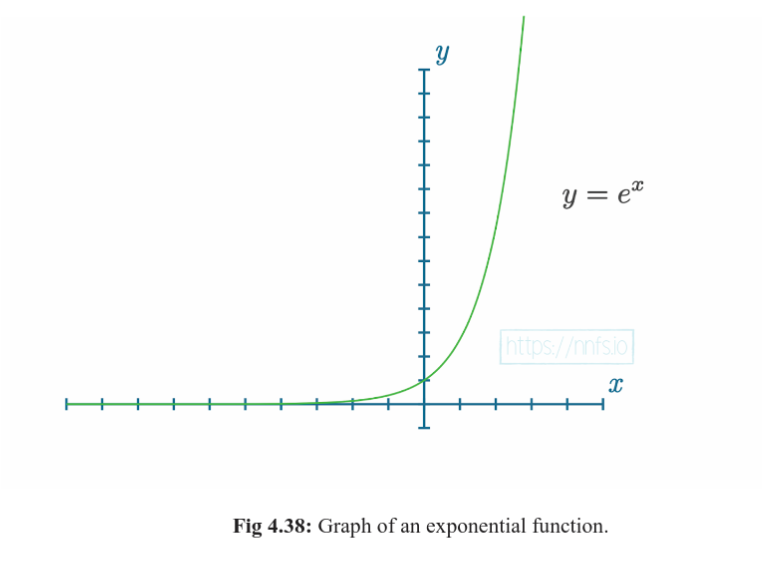

In [6]:
# Now normalize values
norm_base = sum(exp_values)  # We sum all values

norm_values = []

for value in exp_values:
    norm_values.append(value / norm_base)

print(f"Normalized exponentiated values: \n {norm_values}")

print(f"\nSum of normalized values: \n {sum(norm_values)}")

Normalized exponentiated values: 
 [0.8952826639572619, 0.024708306782099374, 0.0800090292606387]

Sum of normalized values: 
 0.9999999999999999


As you can see, sum of all normalized values equals 1.

#### Of course we can write above codes via Numpy as below.

In [3]:
import numpy as np

# Values from the earlier previous when we described
# what a neural network is

layer_outputs = [4.8, 1.21, 2.385]

# For each value in a vector, calculate the exponential value
exp_values = np.exp(layer_outputs)
print(f"Exponentiated values: \n {exp_values}")

# Now normalize values
norm_values = exp_values / np.sum(exp_values)
print(f"Normalized exponentiated values: \n {norm_values}")

print(f"\nSum of normalized values: {np.sum(norm_values)}")

Exponentiated values: 
 [121.51041752   3.35348465  10.85906266]
Normalized exponentiated values: 
 [0.89528266 0.02470831 0.08000903]

Sum of normalized values: 0.9999999999999999


#### To train in batches, we need to convert this functionality to accept layer outputs in batches. Doing this is as easy as:

In [14]:
""""
# just for now, inputs is non-values
>> inputs = [4.8, 1.21, 2.385]

# Get unnormalized probabilities
>> exp_values = np.exp(inputs)

# Normalize them for each sample

>> probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

# axis 0 refers to the rows, and axis 1 refers tothe columns.
# To keep the same dimensions as input we use keepdims=True

"""

'"\n# just for now, inputs is non-values\n>> inputs = [4.8, 1.21, 2.385]\n\n# Get unnormalized probabilities\n>> exp_values = np.exp(inputs)\n\n# Normalize them for each sample\n\n>> probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)\n\n# axis 0 refers to the rows, and axis 1 refers tothe columns.\n# To keep the same dimensions as input we use keepdims=True\n\n'

---

---

### So, let's create Activation Softmax class

In [16]:
#  Softmax activation
class Activation_Softmax:
    
     # Forward pass
     def forward(self, inputs):
        
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,
                                           keepdims=True))
        
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,
                                           keepdims=True)
        
        self.output = probabilities

There are two main pervasive challenges with neural networks:

“dead neurons” and very large numbers (referred to as “exploding” values). “Dead” neurons and enormous numbers can wreak havoc down the line and render a network useless over time. The exponential function used in softmax activation is one of the sources of exploding values. Let’s see some examples of how and why this can easily happen:

In [17]:
import numpy as np

print(np.exp(1))

print(np.exp(10))

print(np.exp(100))

print(np.exp(1000))

2.718281828459045
22026.465794806718
2.6881171418161356e+43
inf


<ipython-input-17-cc78b0df7c35>:9: RuntimeWarning: overflow encountered in exp
  print(np.exp(1000))


* It doesn’t take a very large number, in this case, a mere 1,000, to cause an overflow error. We know the exponential function tends toward 0 as its input value approaches negative infinity, and the output is 1 when the input is 0

In [18]:
import numpy as np

print(np.exp(-np.inf), np.exp(0))

0.0 1.0


* We can use this property to prevent the exponential function from overflowing. Suppose we subtract the maximum value from a list of input values. We would then change the output values to always be in a range from some negative value up to 0, as the largest number subtracted by itself returns 0, and any smaller number subtracted by it will result in a negative number —exactly the range discussed above. With Softmax, thanks to the normalization, we can subtract any value from all of the inputs, and it will not change the output:

In [20]:
softmax = Activation_Softmax()

softmax.forward([[1, 2, 3]])
print(softmax.output)

[[0.09003057 0.24472847 0.66524096]]


In [23]:
softmax.forward([[-2, -1, 0]])  # substracted 3 - max from the list
print(softmax.output)

[[0.09003057 0.24472847 0.66524096]]
